# **USE CASE: Data opportunities labelling automation**

This notebook aims to show the steps of data science modeling, from loading the data, cleaning it and preprocessing it to the steps of building our machine learning model.
In this notebook we will show the following steps:


1- Loading data  
2- Data quality  
3- Exploratory analysis  
4- ML implementation & evalution  
5- ML deployment  

## **Loading data**

In [1]:
# Librairies
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt 
import seaborn as sns 

import pickle
import warnings

In [2]:
# Settings
pd.set_option("display.max_columns", 12)
warnings.filterwarnings('ignore')

In [3]:
# Read and load CSV (data)

path = '../data/'
filename = 'opportunities_pipeline.csv'
opportunities = pd.read_csv(os.path.join(path, filename))

In [4]:
# Save model to disk
def save_model_to_disk(path, filename, model):
    pickle.dump(model, open(os.path.join(path,filename), 'wb'))
    #pickle.dump(model, os.path.join(path,filename))

## **Data quality**

### **Data snapshot**

In [5]:
# Show snapshot of data 
opportunities.head(2)

opt_ID opt_name_data opt_desc_data  opt_name_size  opt_desc_size  \
0  10777400           NaN           NaN              2             40   
1  11003779           NaN           NaN              4             37   

  client_class  ... quarter       mergers stage win_prob total_current_rev  \
0   Très haute  ...  FY20Q3  non_data_acq    3B       90            349988   
1   Très haute  ...  FY21Q1         other    0A       30              9790   

   aai_label  
0          0  
1          0  

[2 rows x 23 columns]

In [6]:
# Global infos on dataset 
opportunities.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   opt_ID             3242 non-null   int64 
 1   opt_name_data      226 non-null    object
 2   opt_desc_data      343 non-null    object
 3   opt_name_size      3242 non-null   int64 
 4   opt_desc_size      3242 non-null   int64 
 5   client_class       3242 non-null   object
 6   id_client          3242 non-null   object
 7   segment            3242 non-null   object
 8   duration           3242 non-null   object
 9   opt_class          3242 non-null   object
 10  sales_capture      3242 non-null   object
 11  count_aai          3242 non-null   int64 
 12  pricing_struct     3242 non-null   object
 13  business_entity    3242 non-null   object
 14  client_location    3242 non-null   object
 15  competition_type   3242 non-null   object
 16  alliances          3242 non-null   object


In [7]:
# Descriptions
opportunities.describe()

opt_ID  opt_name_size  opt_desc_size    count_aai     win_prob  \
count  3.242000e+03    3242.000000    3242.000000  3242.000000  3242.000000   
mean   1.102751e+07       4.482727      16.724553     6.046268    60.461444   
std    4.156137e+05       1.532486      14.250904    13.030724    35.433123   
min    5.571730e+05       1.000000       0.000000     0.000000     0.000000   
25%    1.101940e+07       3.000000       5.000000     0.000000    30.000000   
50%    1.105871e+07       4.000000      11.000000     2.000000    70.000000   
75%    1.109197e+07       5.000000      29.000000     5.000000   100.000000   
max    1.112891e+07       9.000000      51.000000    59.000000   100.000000   

       total_current_rev    aai_label  
count        3242.000000  3242.000000  
mean         3011.888341     0.293029  
std         12572.688893     0.455222  
min             0.000000     0.000000  
25%           148.000000     0.000000  
50%           652.000000     0.000000  
75%          1615.000000     1.000000  
max        349988.000000     1.000000

### **Size of dataset**

In [8]:
print('Dataset has {} rows'.format(opportunities.shape[0]))
print('and {} columns'.format(opportunities.shape[1]))

Dataset has 3242 rows
and 23 columns


### **Data Types**

In [9]:
# numerical variable 
def columns_type(df):
    return pd.DataFrame({
        "type":['numerical feature(s)','categorical feature(s)','time feature(s)'],
        "value":[len(df.select_dtypes(include=['float64','int64']).columns),
                 len(df.select_dtypes(include=['object']).columns),
                 len(df.select_dtypes(include=['datetime64[ns]']).columns)]
    })

columns_type(opportunities)

type  value
0    numerical feature(s)      7
1  categorical feature(s)     16
2         time feature(s)      0

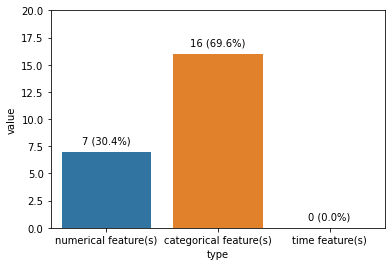

In [10]:
ax = sns.barplot(data=columns_type(opportunities), x="type", y="value", );
total = len(opportunities.columns)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()+1
    ax.annotate("{} ({})".format(int(p.get_height()),percentage), 
                (x, y), ha='center', va='center', color='k')
#plt.tight_layout()
plt.ylim([0,20])
plt.show()

### **Missing values**

In [11]:
# Missing values

percent = pd.DataFrame(opportunities.isnull().sum()/opportunities.shape[0]*100).reset_index()
percent.columns = ['columns_name','Percentage_missing_value']
percent.sort_values('Percentage_missing_value', ascending=False, inplace=True)
percent

columns_name  Percentage_missing_value
1       opt_name_data                 93.028994
2       opt_desc_data                 89.420111
0              opt_ID                  0.000000
13    business_entity                  0.000000
21  total_current_rev                  0.000000
20           win_prob                  0.000000
19              stage                  0.000000
18            mergers                  0.000000
17            quarter                  0.000000
16          alliances                  0.000000
15   competition_type                  0.000000
14    client_location                  0.000000
11          count_aai                  0.000000
12     pricing_struct                  0.000000
10      sales_capture                  0.000000
9           opt_class                  0.000000
8            duration                  0.000000
7             segment                  0.000000
6           id_client                  0.000000
5        client_class                  0.000000
4       opt_desc_size                  0.000000
3       opt_name_size                  0.000000
22          aai_label                  0.000000

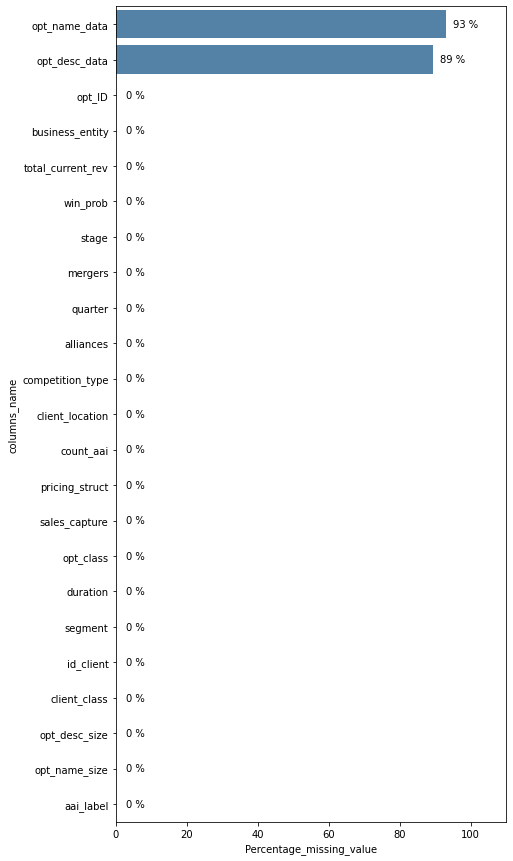

In [12]:
# Plotting
plt.figure(figsize=(7,15));
ax = sns.barplot(data=percent, x='Percentage_missing_value', y='columns_name', color='steelblue');

for p in ax.patches:
    y = p.get_y() + p.get_height() / 2
    x = p.get_width()+6
    ax.annotate("{} % ".format(int(p.get_width())), 
                (x, y), ha='center', va='center', color='k')
plt.xlim([0,110])
plt.show()

we can delete opt_name_data and opt_desc_data columns.

### **Duplicates checking**

In [13]:
# Duplicates values 
## by opt_ID

opportunities[opportunities.duplicated(subset=['opt_ID'], keep=False)] 

Empty DataFrame
Columns: [opt_ID, opt_name_data, opt_desc_data, opt_name_size, opt_desc_size, client_class, id_client, segment, duration, opt_class, sales_capture, count_aai, pricing_struct, business_entity, client_location, competition_type, alliances, quarter, mergers, stage, win_prob, total_current_rev, aai_label]
Index: []

[0 rows x 23 columns]

In [14]:
opportunities.shape

(3242, 23)

In [15]:
opportunities.opt_ID.nunique()

3242

No duplicate opportunities detected.

### **Uniqueness**

In [16]:
for col in opportunities.columns:
    uniqueness = opportunities[col].nunique()
    print('{} : {}'.format(col, uniqueness))
    if uniqueness == 2 :
        print(' Feature {} is non-neccessary. We can drop it !'.format(col))

opt_ID : 3242
opt_name_data : 28
opt_desc_data : 74
opt_name_size : 9
opt_desc_size : 52
client_class : 5
id_client : 396
segment : 5
duration : 2
 Feature duration is non-neccessary. We can drop it !
opt_class : 4
sales_capture : 582
count_aai : 18
pricing_struct : 3
business_entity : 6
client_location : 7
competition_type : 3
alliances : 3
quarter : 11
mergers : 3
stage : 6
win_prob : 22
total_current_rev : 1108
aai_label : 2
 Feature aai_label is non-neccessary. We can drop it !


Any feature have unique modality.

In [17]:
# Test with 2 modality:
opportunities.duration.value_counts()

Moins de 100        3236
Entre 100 et 200       6
Name: duration, dtype: int64

We can't delete it ? Maybe ... or maybe not !

In [18]:
# See information about id_client 

opportunities.id_client.value_counts()

35     158
39     156
8      120
15     100
0       92
      ... 
352      1
150      1
171      1
265      1
393      1
Name: id_client, Length: 396, dtype: int64

In [19]:
opportunities.segment.unique()

array(['B', 'C', 'A', 'E', 'D'], dtype=object)

**The most AAI opportunities**

In [20]:
opportunities.groupby('sales_capture').apply(lambda s: pd.DataFrame({
    'number_of_aai_deal': s.count_aai.unique()
})).reset_index().drop('level_1', axis=1).sort_values('number_of_aai_deal', ascending=False)

sales_capture  number_of_aai_deal
91          blank                  59
373    mathilde.h                  21
450     raymond.j                  16
236       henri.g                  15
87   bernadette.j                  14
..            ...                 ...
258  jacqueline.s                   0
256  jacqueline.p                   0
255    isabelle.v                   0
251       isaac.r                   0
291      jérôme.d                   0

[582 rows x 2 columns]

we will take count_aai instead of sales_capture

In [21]:
opportunities[['business_entity','aai_label']][opportunities.aai_label == 1]['business_entity'].value_counts()

F    357
E    305
D    160
C     74
B     54
Name: business_entity, dtype: int64

In [22]:
opportunities[opportunities.business_entity=='A']

opt_ID opt_name_data opt_desc_data  opt_name_size  opt_desc_size  \
1115  10931972           NaN           NaN              3              1   
1483  11014230           NaN           NaN              6             21   
1627  10984381           NaN           NaN              1              1   

     client_class  ... quarter       mergers stage win_prob total_current_rev  \
1115   Très haute  ...  FY20Q2         other    0A        5                 0   
1483   Très haute  ...  FY20Q1         other    0A        5                 0   
1627        Basse  ...  FY20Q1  non_data_acq    0A       50                 0   

      aai_label  
1115          0  
1483          0  
1627          0  

[3 rows x 23 columns]

Alliances and competition_type

In [23]:
opportunities[['competition_type','alliances','stage','aai_label']][opportunities.aai_label == 1]

competition_type     alliances stage  aai_label
19       Sole Sourced      data_all    0A          1
20       Sole Sourced  non_data_all     1          1
21                  -  non_data_all    0A          1
22       Sole Sourced  non_data_all    3B          1
41       Sole Sourced         other    3B          1
...               ...           ...   ...        ...
3237      Competitive  non_data_all     1          1
3238     Sole Sourced  non_data_all    3B          1
3239     Sole Sourced         other    3B          1
3240     Sole Sourced         other     1          1
3241     Sole Sourced         other     1          1

[950 rows x 4 columns]

In [24]:
opportunities[opportunities['stage']=='3B'][opportunities['aai_label']==1]

opt_ID opt_name_data    opt_desc_data  opt_name_size  opt_desc_size  \
22    11013501           NaN              NaN              8              9   
41    11060915           NaN              NaN              5              5   
59    11055857       Analyse              NaN              5              2   
73    11122446           NaN              NaN              7             34   
74    11052679           NaN              NaN              5              4   
...        ...           ...              ...            ...            ...   
3226  11108386           NaN              NaN              5             37   
3233  11089674           NaN              NaN              2             35   
3234  10973578           NaN              NaN              2             35   
3238  11019965           NaN  Workday Workday              6             26   
3239  10974836           NaN              NaN              4             18   

     client_class  ... quarter   mergers stage win_prob total_current_rev  \
22     Très haute  ...  FY20Q1     other    3B      100               588   
41     Très haute  ...  FY20Q1     other    3B      100               658   
59     Très haute  ...  FY20Q3  data_acq    3B       70              1480   
73     Très haute  ...  FY20Q2     other    3B      100              2644   
74     Très haute  ...  FY20Q1     other    3B      100               672   
...           ...  ...     ...       ...   ...      ...               ...   
3226      Moyenne  ...  FY20Q2     other    3B      100              9954   
3233        Basse  ...  FY20Q3     other    3B       90              1686   
3234        Basse  ...  FY20Q2     other    3B       90               906   
3238        Basse  ...  FY20Q1     other    3B      100               874   
3239      Moyenne  ...  FY20Q1     other    3B       10               694   

      aai_label  
22            1  
41            1  
59            1  
73            1  
74            1  
...         ...  
3226          1  
3233          1  
3234          1  
3238          1  
3239          1  

[339 rows x 23 columns]

### **Target variable**

The target is aai_label : 0 is for uncertain label of opt and 1 is for opt related to data.

In [25]:
opportunities.aai_label.value_counts()

0    2292
1     950
Name: aai_label, dtype: int64

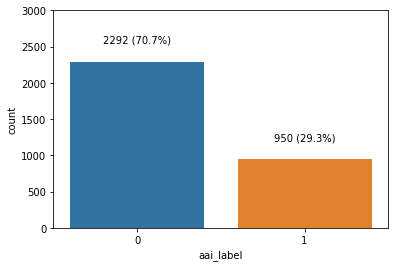

In [26]:
# Visualisation
ax = sns.countplot(x=opportunities.aai_label);

#ax = sns.barplot(data=columns_type(data), x="type", y="value", );
total = len(opportunities)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()+ 300
    ax.annotate("{} ({})".format(int(p.get_height()),percentage), 
                (x, y), ha='center', va='center', color='k')
#plt.tight_layout()
plt.ylim([0,3000])
plt.show()

## **Exploratory data analytics**

### **Corelation (numerical data)**

In [27]:
numeric = opportunities.select_dtypes(include=['float64','int64'])

In [28]:
numeric.head()

opt_ID  opt_name_size  opt_desc_size  count_aai  win_prob  \
0  10777400              2             40          5        90   
1  11003779              4             37          5        30   
2  11049284              8              5          5        70   
3  11067178              8             11          5       100   
4  11046646              6              6          5       100   

   total_current_rev  aai_label  
0             349988          0  
1               9790          0  
2                728          0  
3                696          0  
4                634          0

In [29]:
numeric_true = numeric.drop(['opt_ID','aai_label'], axis=1)

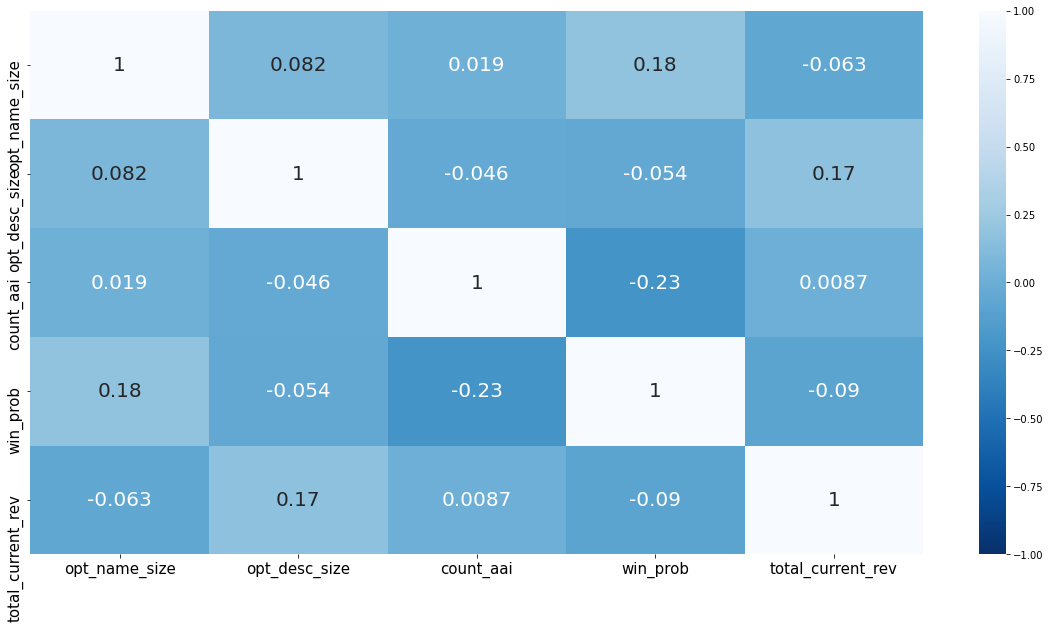

In [30]:
# ignore first column(id) for correlation
plt.figure(figsize=(20,10))
res = sns.heatmap(numeric_true.corr(),
            annot=True, vmax=1,vmin=-1,center=0,cmap='Blues_r', 
            annot_kws={"size":20});

res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15);
res.set_yticklabels(res.get_xmajorticklabels(), fontsize = 15);

No correlation between numerical variable 

------ Table for boxplot ----- 



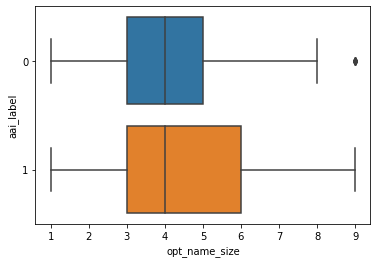



------ Table for boxplot ----- 



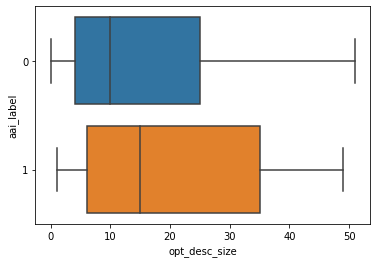



------ Table for boxplot ----- 



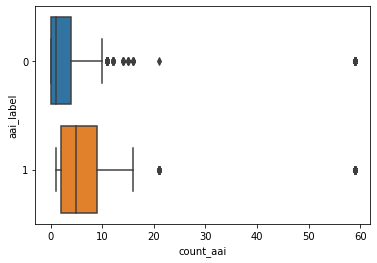



------ Table for boxplot ----- 



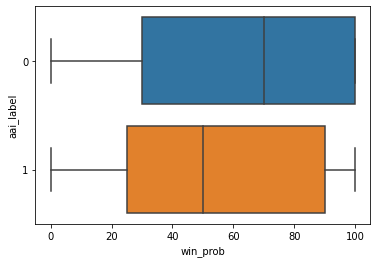



------ Table for boxplot ----- 



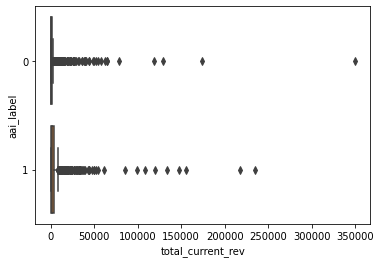

In [31]:
for col in numeric_true.columns : 
    print("------ Table for boxplot ----- \n")
    sns.boxplot(x=opportunities[col], y=opportunities.aai_label.astype(str))
    plt.show()
    #print(opportunities.groupby(['aai_label'])[col].describe())
    print('\n')

probability of win : depends on stage also, no ?

- 'opt_name_size' : no really sensitive
- 'opt_desc_size' and 'count_aai' : a bit sensitive
- 'win prob' and 'total_current_rev' : no interpretable

### **Corelation (numerical data)**

In [32]:
# Correlation between quantitative variables
#from scipy.stats import chisquare

#df=categorical_true.apply(lambda x : pd.factorize(x)[0])+1
#pd.DataFrame([chisquare(df[x].values,f_exp=df.values.T,axis=1)[0] for x in df])

### **Data transformation: categorical data**

In [33]:
categorical = opportunities.select_dtypes(include=['object'])
categorical.head()

opt_name_data opt_desc_data client_class id_client segment      duration  \
0           NaN           NaN   Très haute         0       B  Moins de 100   
1           NaN           NaN   Très haute         0       B  Moins de 100   
2           NaN           NaN   Très haute         0       B  Moins de 100   
3           NaN           NaN   Très haute         0       B  Moins de 100   
4           NaN           NaN   Très haute         0       B  Moins de 100   

   ... client_location competition_type     alliances quarter       mergers  \
0  ...          France      Competitive  non_data_all  FY20Q3  non_data_acq   
1  ...          France     Sole Sourced  non_data_all  FY21Q1         other   
2  ...          France     Sole Sourced  non_data_all  FY20Q3         other   
3  ...          France     Sole Sourced  non_data_all  FY20Q1         other   
4  ...          France     Sole Sourced         other  FY20Q2         other   

  stage  
0    3B  
1    0A  
2    3B  
3    3B  
4    3B  

[5 rows x 16 columns]

In [34]:
# Delete non significant columns regarding the main objective
col_to_delete = ['opt_desc_data', 'opt_name_data', 'id_client',
                 'sales_capture','client_location']
categorical_true = categorical.drop(col_to_delete, axis=1)

In [35]:
categorical_true.columns

Index(['client_class', 'segment', 'duration', 'opt_class', 'pricing_struct',
       'business_entity', 'competition_type', 'alliances', 'quarter',
       'mergers', 'stage'],
      dtype='object')

#### **OHE : One Hot Encoding (dummies encoding)**

In [36]:
# Data Transformation

# - Non ordinal / Dummies 
categorical_true_dummies = pd.get_dummies(
    categorical_true, 
    columns = ['segment','opt_class','pricing_struct','business_entity',
               'competition_type', 'alliances', 'quarter','mergers'], 
    prefix=['segment','opt_class','pricing_struct','business_entity',
               'competition_type', 'alliances', 'quarter','mergers'], 
    prefix_sep='_', 
    drop_first=True
)

In [37]:
categorical_true_dummies

client_class      duration stage  segment_B  segment_C  segment_D  ...  \
0      Très haute  Moins de 100    3B          1          0          0  ...   
1      Très haute  Moins de 100    0A          1          0          0  ...   
2      Très haute  Moins de 100    3B          1          0          0  ...   
3      Très haute  Moins de 100    3B          1          0          0  ...   
4      Très haute  Moins de 100    3B          1          0          0  ...   
...           ...           ...   ...        ...        ...        ...  ...   
3237        Basse  Moins de 100     1          0          1          0  ...   
3238        Basse  Moins de 100    3B          0          1          0  ...   
3239      Moyenne  Moins de 100    3B          0          1          0  ...   
3240        Basse  Moins de 100     1          0          1          0  ...   
3241        Basse  Moins de 100     1          0          0          0  ...   

      quarter_FY21Q3  quarter_FY21Q4  quarter_FY22Q1  quarter_FY22Q2  \
0                  0               0               0               0   
1                  0               0               0               0   
2                  0               0               0               0   
3                  0               0               0               0   
4                  0               0               0               0   
...              ...             ...             ...             ...   
3237               0               0               0               0   
3238               0               0               0               0   
3239               0               0               0               0   
3240               0               0               0               0   
3241               0               0               0               0   

      mergers_non_data_acq  mergers_other  
0                        1              0  
1                        0              1  
2                        0              1  
3                        0              1  
4                        0              1  
...                    ...            ...  
3237                     1              0  
3238                     0              1  
3239                     0              1  
3240                     0              1  
3241                     0              1  

[3242 rows x 33 columns]

#### **OLE: Ordinal Label Encoding**

In [38]:
categorical_true.client_class.unique()

array(['Très haute', 'Moyenne', 'Basse', 'Haute', 'Inconnue'],
      dtype=object)

In [39]:
# - Ordinal encoding
#client_class, duration, stage

# client_class
l1 = categorical_true.client_class.unique()
l2 = [4, 2, 1, 3, 0]
d_client_class = dict(zip(l1, l2))

categorical_true_dummies['client_class'] = categorical_true_dummies['client_class'].map(d_client_class)

In [40]:
# duration
l1 = categorical_true.duration.unique()
l2 = [0, 1]
d_duration = dict(zip(l1, l2))

categorical_true_dummies['duration'] = categorical_true_dummies['duration'].map(d_duration)

In [41]:
# stage
l1 = categorical_true.stage.unique()
l2 = [5, 0, 1, 3, 2, 4]
d_stage = dict(zip(l1, l2))


categorical_true_dummies['stage'] = categorical_true_dummies['stage'].map(d_stage)

In [42]:
d_stage

{'3B': 5, '0A': 0, '1': 1, '2B': 3, '2A': 2, '3A': 4}

In [43]:
categorical_true_dummies.shape

(3242, 33)

In [44]:
categorical_true_dummies

client_class  duration  stage  segment_B  segment_C  segment_D  ...  \
0                4         0      5          1          0          0  ...   
1                4         0      0          1          0          0  ...   
2                4         0      5          1          0          0  ...   
3                4         0      5          1          0          0  ...   
4                4         0      5          1          0          0  ...   
...            ...       ...    ...        ...        ...        ...  ...   
3237             1         0      1          0          1          0  ...   
3238             1         0      5          0          1          0  ...   
3239             2         0      5          0          1          0  ...   
3240             1         0      1          0          1          0  ...   
3241             1         0      1          0          0          0  ...   

      quarter_FY21Q3  quarter_FY21Q4  quarter_FY22Q1  quarter_FY22Q2  \
0                  0               0               0               0   
1                  0               0               0               0   
2                  0               0               0               0   
3                  0               0               0               0   
4                  0               0               0               0   
...              ...             ...             ...             ...   
3237               0               0               0               0   
3238               0               0               0               0   
3239               0               0               0               0   
3240               0               0               0               0   
3241               0               0               0               0   

      mergers_non_data_acq  mergers_other  
0                        1              0  
1                        0              1  
2                        0              1  
3                        0              1  
4                        0              1  
...                    ...            ...  
3237                     1              0  
3238                     0              1  
3239                     0              1  
3240                     0              1  
3241                     0              1  

[3242 rows x 33 columns]

In [45]:
# Concat numerical and categorical variable 

clean_df = pd.concat([numeric_true, categorical_true_dummies], axis=1)
clean_df['aai_label'] = opportunities.aai_label

In [46]:
clean_df

opt_name_size  opt_desc_size  count_aai  win_prob  total_current_rev  \
0                 2             40          5        90             349988   
1                 4             37          5        30               9790   
2                 8              5          5        70                728   
3                 8             11          5       100                696   
4                 6              6          5       100                634   
...             ...            ...        ...       ...                ...   
3237              2             36          1        30                976   
3238              6             26          1       100                874   
3239              4             18          1        10                694   
3240              2              5          1        50                652   
3241              6              9          1        60                602   

      client_class  ...  quarter_FY21Q4  quarter_FY22Q1  quarter_FY22Q2  \
0                4  ...               0               0               0   
1                4  ...               0               0               0   
2                4  ...               0               0               0   
3                4  ...               0               0               0   
4                4  ...               0               0               0   
...            ...  ...             ...             ...             ...   
3237             1  ...               0               0               0   
3238             1  ...               0               0               0   
3239             2  ...               0               0               0   
3240             1  ...               0               0               0   
3241             1  ...               0               0               0   

      mergers_non_data_acq  mergers_other  aai_label  
0                        1              0          0  
1                        0              1          0  
2                        0              1          0  
3                        0              1          0  
4                        0              1          0  
...                    ...            ...        ...  
3237                     1              0          1  
3238                     0              1          1  
3239                     0              1          1  
3240                     0              1          1  
3241                     0              1          1  

[3242 rows x 39 columns]

### **Feature reduction : SVD (Singular Value Decomposition)**

In [47]:
from sklearn.decomposition import TruncatedSVD

In [48]:
# Feature reduction
svd = TruncatedSVD(n_components=32, n_iter=7, random_state=42)
svd.fit(categorical_true_dummies)#.iloc[:, :-1])
save_model_to_disk('models','TruncatedSVD.p', model=svd)

np.cumsum(svd.explained_variance_ratio_)

array([0.31293429, 0.60826853, 0.66382483, 0.71064466, 0.74559183,
       0.77714527, 0.80525413, 0.83292955, 0.85908223, 0.88375357,
       0.90396566, 0.92035722, 0.93414515, 0.9458355 , 0.95554219,
       0.96488929, 0.97110953, 0.97639271, 0.98048393, 0.98442732,
       0.98809082, 0.99148754, 0.99427722, 0.9961232 , 0.99775136,
       0.99865689, 0.99905822, 0.99932563, 0.99957097, 0.99978941,
       0.99995928, 0.9999923 ])

In [49]:
def dimensionaly_reduction(df, n, p):
    Z = df.values
    svd = TruncatedSVD(n_components=Z.shape[1]-1, n_iter=7, random_state=42)
    #calcul 
    coord = svd.fit_transform(Z)
    #valeur corrigée
    eigval = (n-1)/n*svd.explained_variance_
    #valeur corrigée
    eigval = (n-1)/n*svd.explained_variance_
    return svd, coord, eigval

def number_of_factor_detection(p, eigval, svd):
    #scree plot
    plt.figure(figsize = (10, 6))
    plt.plot(np.arange(1,p),eigval, 'bo')
    plt.title("Scree plot")
    plt.ylabel("Eigen values")
    plt.xlabel("Factor number")
    plt.show()
    
    #Cumulative explained variance
    plt.figure(figsize = (10, 6))
    plt.plot(np.arange(1,p),np.cumsum(svd.explained_variance_ratio_))
    plt.title("Explained variance vs. # of factors")
    plt.ylabel("Cumsum explained variance ratio")
    plt.xlabel("Factor number")
    plt.show()

In [50]:
n, p = categorical_true_dummies.shape 

svd, coord, eigval = dimensionaly_reduction(
    df=categorical_true_dummies, 
    n=n, 
    p=p)

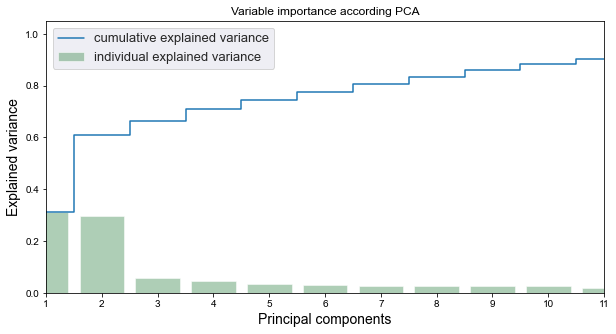

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set(font_scale=1)
plt.step(range(categorical_true_dummies.shape[1]-1), svd.explained_variance_ratio_.cumsum(
), where='mid', label='cumulative explained variance')
sns.barplot(np.arange(1, categorical_true_dummies.shape[1]), svd.explained_variance_ratio_,
            alpha=0.5, color='g', label='individual explained variance')
plt.xlim(0, 10)

#ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize=14)
plt.xlabel('Principal components', fontsize=14)
plt.legend(loc='upper left', fontsize=13)
plt.title('Variable importance according PCA');

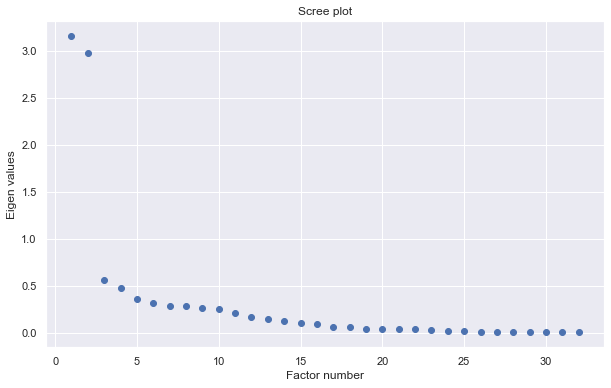

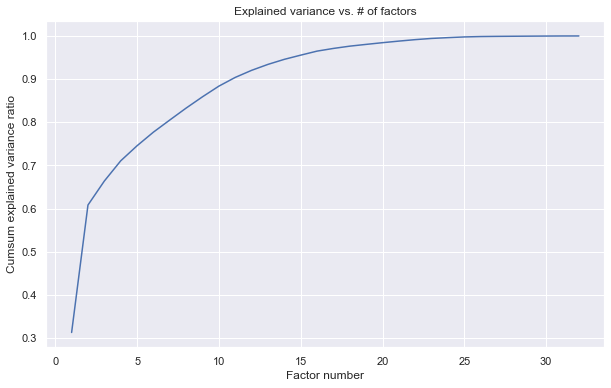

In [52]:
number_of_factor_detection(p=p, eigval=eigval, svd=svd) 

In [53]:
comps = pd.DataFrame(svd.components_, columns=categorical_true_dummies.columns)
comps.to_csv('models/weights_truncatedSVD.csv', index=False)
comps.iloc[:2, :]

client_class  duration     stage  segment_B  segment_C  segment_D  ...  \
0      0.604258  0.000292  0.719894   0.027738   0.064343   0.020705  ...   
1      0.685757  0.001092 -0.672079   0.027823   0.013176   0.014627  ...   

   quarter_FY21Q3  quarter_FY21Q4  quarter_FY22Q1  quarter_FY22Q2  \
0        0.000355        0.000341        0.000256        0.000025   
1        0.002030        0.002398        0.001931        0.000168   

   mergers_non_data_acq  mergers_other  
0              0.036678       0.149151  
1             -0.030236       0.174830  

[2 rows x 33 columns]

In [54]:
def dataframe_with_new_components(df, components):
    #F0, F1 = [], []
    result_by_line = []
    S1 = [list(components.iloc[i, :].values) for i in range(components.shape[0])]
    S2 = [list(df.iloc[i, :].values) for i in range(df.shape[0])]
    for j in S1 : # for component coef
        val_convert = []
        for i in S2: # for initial val of individus
            val_convert.append(sum([e*f for e,f in zip(i,j)]))
        result_by_line.append(val_convert)
        
    data = pd.DataFrame(np.array(result_by_line).T, columns=['F{}'.format(a) for a in range(components.shape[0])])
    return data  

In [55]:
categorical_reduced = dataframe_with_new_components(categorical_true_dummies, comps.iloc[:2, :])

clean_df = pd.concat([numeric_true, categorical_reduced], axis=1)
clean_df['aai_label'] = opportunities.aai_label

In [56]:
categorical_reduced.head(2)

F0        F1
0  6.386573 -0.330470
1  2.956430  3.182439

In [57]:
categorical_true_dummies.head(2)

client_class  duration  stage  segment_B  segment_C  segment_D  ...  \
0             4         0      5          1          0          0  ...   
1             4         0      0          1          0          0  ...   

   quarter_FY21Q3  quarter_FY21Q4  quarter_FY22Q1  quarter_FY22Q2  \
0               0               0               0               0   
1               0               0               0               0   

   mergers_non_data_acq  mergers_other  
0                     1              0  
1                     0              1  

[2 rows x 33 columns]

## **Model Implementation**

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import (confusion_matrix, 
                             accuracy_score, 
                             recall_score, 
                             f1_score, 
                             roc_curve, 
                             roc_auc_score, classification_report)

### **Method 1: Supervised Learning (Novelty detection with Local Outlier Factor**)

In [59]:
# Training dataset 

data_opport = clean_df[clean_df['aai_label']==1] # Get only data opportunities
X = data_opport.iloc[:, :-1]
y = [1]*data_opport.shape[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=10)

# Scaling 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Uncertain label opt
uncertain_opport_label = clean_df[clean_df['aai_label']==0]
X_uncertain = uncertain_opport_label.iloc[:, :-1]
X_uncertain_scaled = scaler.transform(X_uncertain)

In [60]:
n_false_negative = []
n_predicted_negative = []

for n_neighbors in range(1,41):
    lof = LocalOutlierFactor(novelty=True, n_neighbors=n_neighbors)
    lof.fit(X_train_scaled)
    #print(pd.DataFrame(lof.predict(X_test_scaled)).value_counts())
    #print(pd.DataFrame(lof.predict(X_uncertain_scaled)).value_counts())

    n_false_negative.append(pd.DataFrame(
        lof.predict(X_test_scaled)).value_counts().to_list()[1])
    n_predicted_negative.append(pd.DataFrame(
        lof.predict(X_uncertain_scaled)).value_counts().to_list()[1])

In [82]:
n_false_negative

[50,
 21,
 14,
 12,
 11,
 11,
 8,
 11,
 10,
 10,
 12,
 10,
 11,
 12,
 11,
 10,
 9,
 9,
 9,
 9,
 7,
 5,
 6,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [83]:
n_predicted_negative

[649,
 338,
 175,
 112,
 96,
 90,
 75,
 83,
 85,
 84,
 79,
 78,
 76,
 74,
 71,
 71,
 66,
 63,
 62,
 58,
 58,
 52,
 51,
 48,
 46,
 46,
 46,
 43,
 35,
 35,
 37,
 34,
 35,
 30,
 23,
 21,
 19,
 19,
 21,
 21]

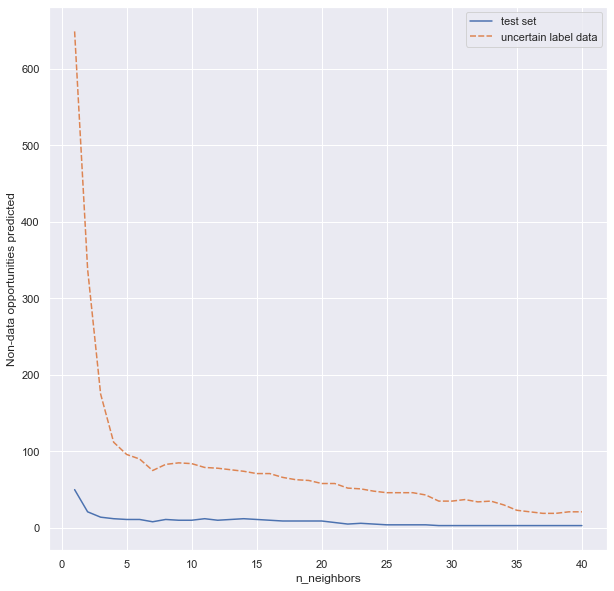

In [61]:
data_plot = pd.DataFrame({
    "test set":n_false_negative,
    "uncertain label data":n_predicted_negative,
    "n_neighbors": range(1,41)
}).set_index("n_neighbors")

plt.figure(figsize=(10,10))
sns.set_style(None)
sns.lineplot(data=data_plot)
plt.ylabel('Non-data opportunities predicted');

### **Method 2: Unsupervised Learning (Kmeans**)

In [62]:
clean_df

opt_name_size  opt_desc_size  count_aai  win_prob  total_current_rev  \
0                 2             40          5        90             349988   
1                 4             37          5        30               9790   
2                 8              5          5        70                728   
3                 8             11          5       100                696   
4                 6              6          5       100                634   
...             ...            ...        ...       ...                ...   
3237              2             36          1        30                976   
3238              6             26          1       100                874   
3239              4             18          1        10                694   
3240              2              5          1        50                652   
3241              6              9          1        60                602   

            F0        F1  aai_label  
0     6.386573 -0.330470          0  
1     2.956430  3.182439          0  
2     6.608556 -0.179143          0  
3     6.618939 -0.280445          0  
4     6.680060 -0.222898          0  
...        ...       ...        ...  
3237  1.731790  0.172269          1  
3238  4.824221 -2.348268          1  
3239  5.502542 -1.592546          1  
3240  2.008324  0.511315          1  
3241  1.943981  0.498139          1  

[3242 rows x 8 columns]

In [63]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(clean_df.iloc[:, :-1])
save_model_to_disk('models','MinMaxScaler.p', model=scaler)

# Optimal number of cluster
kmeans_kwargs = {
     "init": "k-means++",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

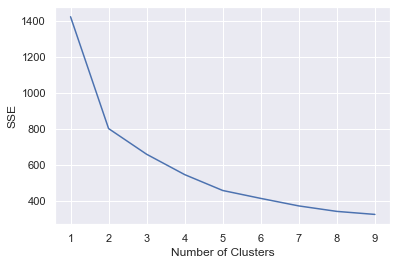

In [64]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

#plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

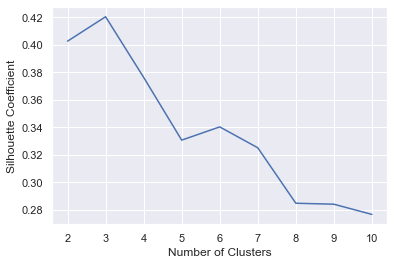

In [65]:
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
    
#plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

We choose 3 classes for kmeans clustering.

In [66]:
kmeans = KMeans(
               init="k-means++",
               n_clusters=3,
               n_init=10,
               max_iter=300,
               random_state=42
           )

In [67]:
data_cluster = clean_df.copy()
data_cluster['class'] = kmeans.fit_predict(scaled_features)
save_model_to_disk('models','kmeans_classification.p', model=kmeans)

data_cluster['homolog_class'] = [1 if x in [1,2] else 0 for x in data_cluster['class'] ]

In [68]:
data_cluster['label_class'] = data_cluster['class'].replace([0, 1, 2], 
                                                            ['cluster_0', 'cluster_1', 'cluster_2'])

In [69]:
print(classification_report(
    y_true=data_cluster.aai_label,
    y_pred=data_cluster.homolog_class
))

              precision    recall  f1-score   support

           0       0.65      0.05      0.09      2292
           1       0.29      0.94      0.44       950

    accuracy                           0.31      3242
   macro avg       0.47      0.49      0.27      3242
weighted avg       0.55      0.31      0.19      3242



In [70]:
confusion_matrix(
    y_true=data_cluster.aai_label,
    y_pred=data_cluster.homolog_class
)

array([[ 111, 2181],
       [  59,  891]])

In [71]:
data_cluster.columns

Index(['opt_name_size', 'opt_desc_size', 'count_aai', 'win_prob',
       'total_current_rev', 'F0', 'F1', 'aai_label', 'class', 'homolog_class',
       'label_class'],
      dtype='object')

<AxesSubplot:>

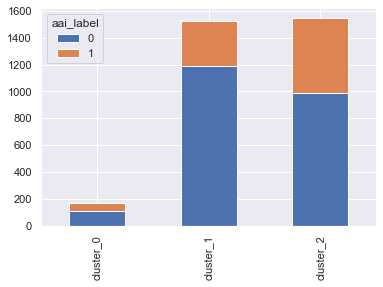

In [72]:
pd.get_dummies(
    data_cluster, 
    columns = ['label_class'], 
    prefix='', 
    prefix_sep='', 
    drop_first=False
)[[ 'aai_label','cluster_0','cluster_1','cluster_2']].\
groupby('aai_label').sum().T.plot(kind='bar', stacked=True)

## **ML deployment**

In [73]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [74]:
opportunities.client_class.unique()

array(['Très haute', 'Moyenne', 'Basse', 'Haute', 'Inconnue'],
      dtype=object)

In [77]:
## Functions for deploying machine learning model


def load_models(filename: str):
    """ Load pickle model """
    with open(filename, 'rb') as fp:
        model = pickle.load(fp)
    return model


def sep_numerical_categorical(df: pd.DataFrame) -> tuple:
    """ Separate numerical and categorical dataset """
    
    numeric_features = df.select_dtypes(include=['float64','int64'])
    categorical_features = df.select_dtypes(include=['object'])
    return numeric_features, categorical_features

def feature_selection_numerical(num_df: pd.DataFrame) -> pd.DataFrame:
    """ Delete unusable columns """
    
    col_to_delete = ['aai_label', 'opt_ID']
    num_df.drop(col_to_delete, axis=1, inplace=True)
    return num_df
    
def feature_selection_categorical(cat_df: pd.DataFrame) -> pd.DataFrame:
    """ Delete unusable columns """
    
    col_to_delete = ['opt_desc_data', 'opt_name_data', 'id_client',
                     'sales_capture','client_location']
    cat_df = cat_df.drop(col_to_delete, axis=1)
    return cat_df


def categorical_transformer_OHE(cat_df: pd.DataFrame) -> pd.DataFrame:
    """ Transform categorical variable to numerical one : One Hot Encoding """
    
    # Dummies encoding
    categorical_dummies = pd.get_dummies(
        cat_df, 
        columns = ['segment','opt_class','pricing_struct','business_entity',
                   'competition_type', 'alliances', 'quarter','mergers'], 
        prefix=['segment','opt_class','pricing_struct','business_entity',
                   'competition_type', 'alliances', 'quarter','mergers'], 
        prefix_sep='_', 
        drop_first=True
    )
    
    return categorical_dummies


def categorical_transformer_OE(cat_df: pd.DataFrame) -> pd.DataFrame:
    """ Transform categorical variable to numerical one : Ordinal Encoding """
    
    class_dic = {'Inconnue': 0, 'Basse': 1, 'Moyenne': 2, 'Haute':3, 'Très haute':4}
    duration_dic = {'Moins de 100': 0,'Entre 100 et 200':1}
    stage_dic = {'0A':0, '1':1, '2A':2, '2B':3, '3A':4, '3B':5}
    
    labels = ['client_class', 'duration', 'stage']
    list_dic = [d_client_class, duration_dic, stage_dic]
    
    for lab, dic in zip(labels, list_dic):
        cat_df[lab] = cat_df[lab].map(dic)
        
    return cat_df
        

def feature_transformation_into_principal_component(cat_df: pd.DataFrame, components: pd.DataFrame, number=2) -> pd.DataFrame:
    """ Transform initial data into principal component from SVD """
    
    result_by_line = []
    S1 = [list(components.iloc[i, :].values) for i in range(components.shape[0])]
    S2 = [list(cat_df.iloc[i, :].values) for i in range(cat_df.shape[0])]
    
    for j in S1 : # for component coef
        val_convert = []
        for i in S2: # for initial val of individus
            val_convert.append(sum([e*f for e,f in zip(i,j)]))
        result_by_line.append(val_convert)
        
    data = pd.DataFrame(np.array(result_by_line).T, columns=['F{}'.format(a) for a in range(components.shape[0])])
    return data


def concatenor_dataframe(numerical_data: pd.DataFrame, categorical_data: pd.DataFrame) -> pd.DataFrame:
    """ Merge numerical and categorical data """
    clean_df = pd.concat([numerical_data.reset_index().drop('index', axis=1), 
                          categorical_data.reset_index().drop('index', axis=1)],
                         axis=1, ignore_index=True)
    return clean_df
    
    
    
def dataframe_with_new_components(df: pd.DataFrame, svd_model) -> pd.DataFrame:
    """ Transform initial data into principal component from SVD """
    components = pd.DataFrame(svd_model.components_, columns=df.columns)
    components = components.iloc[:2, :]
    result_by_line = []
    S1 = [list(components.iloc[i, :].values) for i in range(components.shape[0])]
    S2 = [list(df.iloc[i, :].values) for i in range(df.shape[0])]
    for j in S1 : # for component coef
        val_convert = []
        for i in S2: # for initial val of individus
            val_convert.append(sum([e*f for e,f in zip(i,j)]))
        result_by_line.append(val_convert)
    data = pd.DataFrame(np.array(result_by_line).T, columns=['F{}'.format(a) for a in range(components.shape[0])])
    
    return data 


def prediction(kmeans_model, features: np.array, df: pd.DataFrame) -> dict:
    """ Make a prediction of label for the opportunity"""
    df['class'] = kmeans_model.predict(features)
    df['homolog_class'] = [1 if x in [1,2] else 0 for x in df['class'] ]
    return df[['opt_ID','homolog_class']].to_dict('records')


In [78]:
# Load models
scaling = load_models('models/MinMaxScaler.p')
svd_trunc = load_models('models/TruncatedSVD.p')
kmeans_class = load_models('models/Kmeans_classification.p')

In [80]:
def main(df: pd.DataFrame, svd_model, scaling, kmeans_model) -> None :
    """ Main function to make prediction for an or more opportunities """
    
    numeric_features, categorical_features = sep_numerical_categorical(df)
    
    numeric_features = feature_selection_numerical(numeric_features)
    categorical_features = feature_selection_categorical(categorical_features)
    
    categorical_transformer_df = categorical_transformer_OHE(categorical_features)
    categorical_transformer_df = categorical_transformer_OE(categorical_transformer_df)
    
    for col in ['client_class', 'duration', 'stage', 'segment_B', 'segment_C',
       'segment_D', 'segment_E', 'opt_class_Importante', 'opt_class_Moyenne',
       'opt_class_Très Importante', 'pricing_struct_type A',
       'pricing_struct_type B', 'business_entity_B', 'business_entity_C',
       'business_entity_D', 'business_entity_E', 'business_entity_F',
       'competition_type_Competitive', 'competition_type_Sole Sourced',
       'alliances_non_data_all', 'alliances_other', 'quarter_FY20Q1',
       'quarter_FY20Q2', 'quarter_FY20Q3', 'quarter_FY20Q4', 'quarter_FY21Q1',
       'quarter_FY21Q2', 'quarter_FY21Q3', 'quarter_FY21Q4', 'quarter_FY22Q1',
       'quarter_FY22Q2', 'mergers_non_data_acq', 'mergers_other']:
        if col not in categorical_transformer_df.columns:
            categorical_transformer_df[col] = 0
            
    categorical_transformer_df = dataframe_with_new_components(categorical_transformer_df, svd_trunc)
    
    concatenor_df = concatenor_dataframe(numeric_features, categorical_transformer_df)
    scaled_features = scaling.transform(concatenor_df)
    prediction_data = prediction(kmeans_model=kmeans_model, features=scaled_features, df=df)
    print(prediction_data)

In [81]:
# Application

df_deploy = opportunities.iloc[10:12, :] # random opportunities

main(df=df_deploy, svd_model=svd_trunc, scaling=scaling, kmeans_model=kmeans_class) # Prediction

[{'opt_ID': 10967971, 'homolog_class': 1}, {'opt_ID': 11121519, 'homolog_class': 1}]


## _____________________________________